## Explore Business Analysis

Importing Packages

In [44]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

In [45]:
path='D:\The Sparks Foundation\SampleSuperstore.csv'
data=pd.read_csv(path)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [46]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null values, hence the data is clean

In [47]:
print(data['Ship Mode'].unique())
print(data['Segment'].unique())
print(data['Category'].unique())
print(data['Sub-Category'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [48]:
cat_data=data.groupby('Category').sum()
cat_data

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
Technology,102603754,836154.0330,6939,244.40,145454.9481


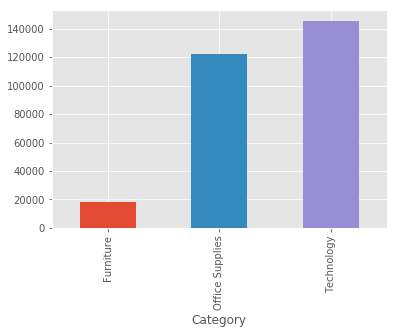

In [49]:
cat_data['Profit'].plot(kind='bar')

We can see that the Technology sector accounts for most of the profit.

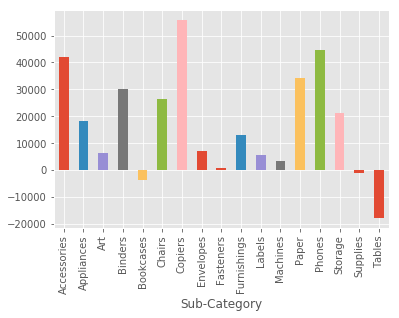

In [50]:
data.groupby('Sub-Category').sum()['Profit'].plot(kind='bar')

Sub-Categories like Bookcases, Supplies and Tables are making losses. On the other hand, Copiers, Phones and Accessories are making huge profits.

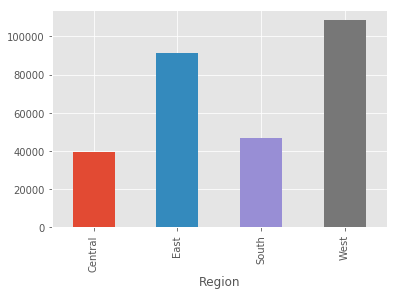

In [51]:
data.groupby('Region').sum()['Profit'].plot(kind='bar')

Taking a look at the region, the west and east regions are making more profits.

In [52]:
top_states=data.groupby('State').sum()['Profit'].sort_values(ascending=False)
top_states.head()

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

In [55]:
top10_states=top_states.head(10)
top10_states=top10_states.to_frame()
top10_states.head()

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504


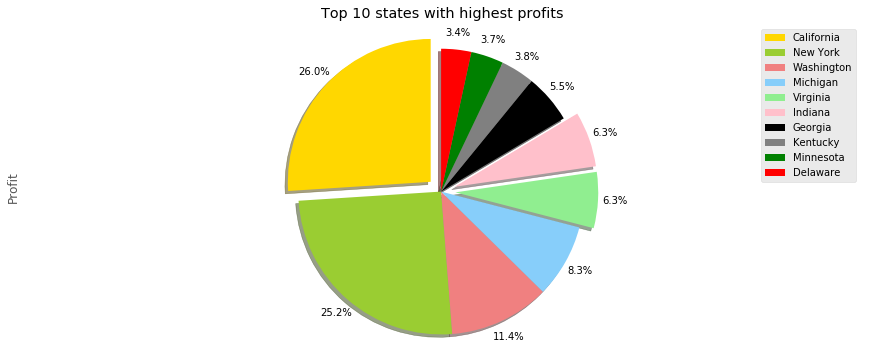

In [58]:

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','black','grey','green','red']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1,0,0,0,0] # ratio for each continent with which to offset each wedge.

top10_states['Profit'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Top 10 states with highest profits') 

plt.axis('equal') 

# add legend
plt.legend(labels=top10_states.index, loc='upper right') 

plt.show()


This pie-chart shows the percentage profit generated by the top 10 states. California tops the list and New York comes second.

On a whole, Technology sector generates more profits whereas Furniture sector generates less profit. Moreover, tables are making a huge loss hence it will be advisable to stop selling tables. Also,more marketing has to be done in states generating less profit in order to increase sales.